multivariable linear regression  
ydata = w1x1+w2x2+w3x3+b  
영수 : 90 90 90 -> 최종점수는?

In [15]:
import tensorflow as tf

In [16]:
import tensorflow.compat.v1 as tf # 1.xxversion을 사용
tf.disable_v2_behavior() #2.xx version 기능 사용불가
#tf 1.xx version -> 2.xx version

In [17]:
x = tf.placeholder(tf.float32, [None, 3])
#x는 플레이스 홀더, 학습하고자 하는 데이터를 임시로 저장하는 저장소. 타입은 실수 shape는 none(건수는 일정하지 않음)
#컬럼수는 3
y=tf.placeholder(tf.float32,[None, 1])

In [18]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
w1 = tf.Variable(tf.random_normal([1]))
w2 = tf.Variable(tf.random_normal([1]))
w3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

hf = x1*w1+x2*w2+x3*w3+b
# 예측값과 실제값 사이의차에대한 제곱합의 평균
cost = tf.reduce_mean(tf.square(hf -y))
opt = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = opt.minimize(cost)
#그래프 정의
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(3001):
    _, cv, hfv = sess.run([train, cost, hf], feed_dict = {x1: x1_data, x2:x2_data, x3:x3_data, y:y_data})
    if step%10 == 0:
        print(step, 'cost :', cv, '\nprediction :', hfv)


0 cost : 13137.513 
prediction : [54.97264  59.025677 62.07181  65.34434  44.91365 ]
10 cost : 11.499489 
prediction : [156.30931 180.84935 182.09396 196.04712 137.83917]
20 cost : 11.319683 
prediction : [156.60297 181.22682 182.45312 196.43988 138.1318 ]
30 cost : 11.260405 
prediction : [156.59094 181.2368  182.45023 196.43839 138.14412]
40 cost : 11.201424 
prediction : [156.57802 181.24564 182.44624 196.43568 138.15556]
50 cost : 11.142792 
prediction : [156.56512 181.25444 182.44228 196.433   138.16696]
60 cost : 11.084452 
prediction : [156.55228 181.26323 182.43831 196.43033 138.17834]
70 cost : 11.026408 
prediction : [156.53946 181.272   182.43436 196.42766 138.1897 ]
80 cost : 10.968715 
prediction : [156.52667 181.28073 182.4304  196.42499 138.201  ]
90 cost : 10.911297 
prediction : [156.51393 181.28947 182.42648 196.42235 138.2123 ]
100 cost : 10.854199 
prediction : [156.5012  181.29817 182.42256 196.41972 138.22354]
110 cost : 10.797441 
prediction : [156.48853 181.3068

영수 : 90 90 90 -> 최종점수는?

In [19]:
print(sess.run(hf, feed_dict={x1:90,x2:90,x3:90}))
print(sess.run(hf, feed_dict={x1:50, x2:50, x3:50}))
print(sess.run(hf, feed_dict={x1:[50,90], x2:[50,90], x3:[50,90]}))

[181.7321]
[100.521194]
[100.521194 181.7321  ]


In [20]:
x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]
x = tf.placeholder(tf.float32,[None,3])
y = tf.placeholder(tf.float32,[None,1])

In [21]:
w=tf.Variable(tf.random_normal([3,1]))
b=tf.Variable(tf.random_normal([1]))

In [22]:
hf=tf.matmul(x,w)+b
#x.shape => (None,3) (3,1)->(none,1)

In [23]:
cost = tf.reduce_mean(tf.square(hf -y))
opt=tf.train.GradientDescentOptimizer(1e-5)
train = opt.minimize(cost)


In [24]:
#그래프 정의
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(3001):
    _, cv, hfv = sess.run([train, cost, hf], feed_dict = {x: x_data,y:y_data})
    if step%10 == 0:
        print(step, 'cost :', cv, '\nprediction :', hfv)


0 cost : 2814.0085 
prediction : [[196.01843]
 [242.92586]
 [235.52165]
 [256.1123 ]
 [187.61658]]
10 cost : 3.5283265 
prediction : [[149.12848]
 [186.55414]
 [179.98465]
 [195.63315]
 [144.61646]]
20 cost : 3.484459 
prediction : [[148.9937 ]
 [186.37872]
 [179.81879]
 [195.45175]
 [144.47995]]
30 cost : 3.4664009 
prediction : [[149.00037]
 [186.37335]
 [179.82045]
 [195.4528 ]
 [144.47314]]
40 cost : 3.4484482 
prediction : [[149.00745]
 [186.3685 ]
 [179.82262]
 [195.4544 ]
 [144.46677]]
50 cost : 3.430612 
prediction : [[149.0145 ]
 [186.36366]
 [179.82477]
 [195.45598]
 [144.4604 ]]
60 cost : 3.4128425 
prediction : [[149.02153]
 [186.35883]
 [179.82692]
 [195.45755]
 [144.45404]]
70 cost : 3.3951728 
prediction : [[149.02855]
 [186.35403]
 [179.82907]
 [195.45915]
 [144.4477 ]]
80 cost : 3.3776157 
prediction : [[149.03555]
 [186.34923]
 [179.8312 ]
 [195.46071]
 [144.44139]]
90 cost : 3.3601432 
prediction : [[149.04253]
 [186.34444]
 [179.83336]
 [195.4623 ]
 [144.43509]]
100

In [25]:
#90 90 90 예상점수
print(sess.run(hf, feed_dict={x:[[90,90,90]]})[0][0])

181.08018


<h1>test-score.csv 사용 실습<h1>

In [26]:
xy=np.loadtxt("test-score.csv", delimiter=",", dtype=np.float32)
x_data=xy[:,0:-1]
y_data=xy[:,[-1]]

In [27]:
print(x_data)
print(ydata)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]

In [28]:
x = tf.placeholder(tf.float32,[None,3])
y = tf.placeholder(tf.float32,[None,1])
w=tf.Variable(tf.random_normal([3,1]))
b=tf.Variable(tf.random_normal([1]))

In [29]:
hf=tf.matmul(x,w)+b

cost = tf.reduce_mean(tf.square(hf -y))
opt=tf.train.GradientDescentOptimizer(1e-5)
train = opt.minimize(cost)


In [30]:
#그래프 정의
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(3001):
    _, cv, hfv = sess.run([train, cost, hf], feed_dict = {x: x_data,y:y_data})
    if step%10 == 0:
        print(step, 'cost :', cv, '\nprediction :', hfv)

0 cost : 50637.05 
prediction : [[-67.35799 ]
 [-63.922153]
 [-71.91194 ]
 [-74.70599 ]
 [-47.82207 ]
 [-28.339281]
 [-55.828587]
 [-41.613365]
 [-51.71217 ]
 [-38.8316  ]
 [-52.42579 ]
 [-42.999813]
 [-77.50319 ]
 [-68.52231 ]
 [-53.19479 ]
 [-63.07816 ]
 [-64.357216]
 [-68.379005]
 [-77.087776]
 [-70.31545 ]
 [-64.04047 ]
 [-57.742046]
 [-63.536655]
 [-75.57633 ]
 [-70.45251 ]]
10 cost : 57.62955 
prediction : [[142.67914 ]
 [188.46397 ]
 [176.79962 ]
 [196.14835 ]
 [144.6582  ]
 [113.544075]
 [146.91501 ]
 [108.68963 ]
 [184.13303 ]
 [179.58792 ]
 [142.90128 ]
 [149.56635 ]
 [179.46086 ]
 [145.10236 ]
 [150.47064 ]
 [193.029   ]
 [139.0877  ]
 [174.93962 ]
 [167.90161 ]
 [148.896   ]
 [173.70413 ]
 [179.02267 ]
 [163.14236 ]
 [136.21628 ]
 [191.13116 ]]
20 cost : 54.814262 
prediction : [[144.16386]
 [190.18929]
 [178.53102]
 [198.02284]
 [145.96848]
 [114.48602]
 [148.31822]
 [109.73175]
 [185.71812]
 [181.02625]
 [144.24696]
 [150.86282]
 [181.25993]
 [146.60982]
 [151.87022]
 [19

<h2>로지스틱 회귀 


In [31]:
#시간, 일
x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
          #합,불
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

In [32]:
np.shape(x_data) #(6, 2)
np.shape(y_data) #(6, 1)

(6, 1)

In [33]:
x=tf.placeholder(tf.float32, shape=[None, 2])
y=tf.placeholder(tf.float32, shape=[None, 1])

In [34]:
w=tf.Variable(tf.random_normal([2,1]))
b=tf.Variable(tf.random_normal([1]))

In [35]:
hf=tf.sigmoid(tf.matmul(x,w) +b)

In [36]:
cost = -tf.reduce_mean(y*tf.log(hf) + (1-y)*tf.log(1-hf))

In [37]:
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [38]:
predicted=tf.cast(hf>0.5, dtype=tf.float32) #Trye->1.0 False->0.0
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with 구문 사용

In [39]:
with tf.Session() as sess: #sess=tf.Session(), with 구문을 벗어나면 알아서 세션을 종료시켜준다
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        _, cv =sess.run([train, cost], feed_dict={x:x_data, y:y_data})
        if step%200==0:
            print(step, cv)
    h,p,a =sess.run([hf, predicted, accuracy], feed_dict={x:x_data, y:y_data})
    print("hf: ", h, "pred: ",p, "acc: ",a)    

0 0.61916435
200 0.520673
400 0.47393632
600 0.44548813
800 0.42479983
1000 0.40790918
1200 0.39314857
1400 0.37974966
1600 0.3673295
1800 0.35568324
2000 0.34469196
2200 0.33428085
2400 0.32439774
2600 0.31500307
2800 0.30606416
3000 0.29755303
3200 0.28944433
3400 0.28171456
3600 0.27434212
3800 0.26730663
4000 0.2605889
4200 0.25417104
4400 0.24803609
4600 0.24216793
4800 0.2365518
5000 0.23117357
5200 0.22602004
5400 0.22107875
5600 0.21633817
5800 0.21178742
6000 0.20741606
6200 0.20321475
6400 0.19917434
6600 0.19528657
6800 0.19154347
7000 0.18793757
7200 0.1844619
7400 0.18111001
7600 0.17787565
7800 0.17475317
8000 0.17173703
8200 0.16882217
8400 0.16600384
8600 0.16327745
8800 0.16063876
9000 0.15808384
9200 0.15560876
9400 0.15321006
9600 0.15088433
9800 0.14862838
10000 0.14643921
10200 0.14431398
10400 0.14224991
10600 0.14024459
10800 0.13829546
11000 0.1364004
11200 0.13455714
11400 0.1327636
11600 0.13101786
11800 0.12931809
12000 0.12766246
12200 0.12604938
12400 0.124

<h2>diabetes.csv

In [40]:
xy =np.loadtxt("diabetes.csv", delimiter=",", dtype=np.float32)
xdata = xy[:,0:-1]
ydata = xy[:,[-1]]

print(xdata.shape)
print(ydata.shape)

(759, 8)
(759, 1)


In [41]:
x=tf.placeholder(tf.float32,[None,8])
y=tf.placeholder(tf.float32,[None,1])
w=tf.Variable(tf.random_normal([8,1]))
b=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(x,w)+ b)
cost=-tf.reduce_mean(y*tf.log(hf) + (1-y)*tf.log(1-hf))

In [42]:
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)
predicted=tf.cast(hf>0.5, dtype=tf.float32) #Trye->1.0 False->0.0
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [43]:
with tf.Session() as sess: #sess=tf.Session(), with 구문을 벗어나면 알아서 세션을 종료시켜준다
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        _, cv =sess.run([train, cost], feed_dict={x:xdata, y:ydata})
        if step%200==0:
            print(step, cv)
    h,p,a =sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
    print("hf: ", h, "pred: ",p, "acc: ",a) 

0 0.93633986
200 0.74565333
400 0.69922936
600 0.67404616
800 0.65409356
1000 0.6369314
1200 0.6219443
1400 0.6088019
1600 0.5972437
1800 0.5870473
2000 0.57802135
2200 0.57000303
2400 0.5628533
2600 0.5564541
2800 0.5507057
3000 0.545523
3200 0.5408342
3400 0.5365777
3600 0.53270143
3800 0.52916056
4000 0.5259167
4200 0.52293676
4400 0.52019227
4600 0.5176584
4800 0.51531357
5000 0.51313907
5200 0.51111835
5400 0.509237
5600 0.5074823
5800 0.50584286
6000 0.5043086
6200 0.5028707
6400 0.50152117
6600 0.50025284
6800 0.49905938
7000 0.49793482
7200 0.4968741
7400 0.49587262
7600 0.49492577
7800 0.49402982
8000 0.49318147
8200 0.49237713
8400 0.49161386
8600 0.49088925
8800 0.4902005
9000 0.4895454
9200 0.4889219
9400 0.48832804
9600 0.487762
9800 0.4872221
10000 0.4867069
10200 0.4862149
10400 0.48574468
10600 0.48529506
10800 0.484865
11000 0.4844533
11200 0.48405904
11400 0.48368117
11600 0.4833189
11800 0.48297143
12000 0.48263803
12200 0.4823179
12400 0.48201036
12600 0.48171481
12


연습문제  
train->model->test ->모델평가  
pima-indian-diabetes.csv   -> 그룹화 연습 -> 요약
주식예측(삼성전자)  
독버섯 분류   
  

In [44]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size= 0.3, random_state=321)

In [45]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(531, 8)
(228, 8)
(531, 1)
(228, 1)


In [46]:
x=tf.placeholder(tf.float32,[None,8])
y=tf.placeholder(tf.float32,[None,1])
w=tf.Variable(tf.random_normal([8,1]))
b=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(x,w)+ b)
cost=-tf.reduce_mean(y*tf.log(hf) + (1-y)*tf.log(1-hf))

In [47]:
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)
predicted=tf.cast(hf>0.5, dtype=tf.float32) #True->1.0 False->0.0
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [48]:
with tf.Session() as sess: #sess=tf.Session(), with 구문을 벗어나면 알아서 세션을 종료시켜준다
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        _, cv =sess.run([train, cost], feed_dict={x:xtrain, y:ytrain})
        # if step%200==0:
        #     print(step, cv)
    h,p,a =sess.run([hf, predicted, accuracy], feed_dict={x:xtest, y:ytest})
    print("hf: ", h, "pred: ",p, "acc: ",a) 

hf:  [[0.18097171]
 [0.91343284]
 [0.6223109 ]
 [0.8969796 ]
 [0.8730558 ]
 [0.7389966 ]
 [0.86637115]
 [0.78994083]
 [0.611464  ]
 [0.45810708]
 [0.696948  ]
 [0.89527225]
 [0.93618804]
 [0.07485726]
 [0.95389163]
 [0.87125504]
 [0.5320567 ]
 [0.4571213 ]
 [0.90717214]
 [0.38249767]
 [0.7341848 ]
 [0.883295  ]
 [0.263919  ]
 [0.73635983]
 [0.73670346]
 [0.7937665 ]
 [0.93704855]
 [0.8814597 ]
 [0.6408018 ]
 [0.94041336]
 [0.95452505]
 [0.83928764]
 [0.776062  ]
 [0.06409538]
 [0.573233  ]
 [0.7496784 ]
 [0.6420873 ]
 [0.8508941 ]
 [0.69423497]
 [0.6898691 ]
 [0.5083973 ]
 [0.6315777 ]
 [0.7831657 ]
 [0.8778175 ]
 [0.5817676 ]
 [0.33875674]
 [0.7108333 ]
 [0.7515631 ]
 [0.6645474 ]
 [0.9314368 ]
 [0.32494423]
 [0.84716827]
 [0.28435636]
 [0.6118674 ]
 [0.4472053 ]
 [0.8325794 ]
 [0.6527227 ]
 [0.82678854]
 [0.8372144 ]
 [0.9508687 ]
 [0.6869868 ]
 [0.72275525]
 [0.6419413 ]
 [0.7874532 ]
 [0.7666801 ]
 [0.44000867]
 [0.82953495]
 [0.9083791 ]
 [0.40306228]
 [0.95819426]
 [0.935882  ]
 

<h1>피마 인디언 -> 그룹화 연습->요약(임신횟수당(0~17) 당뇨병 발병확률)->상관관계 그래프->당뇨병분류기

In [49]:
# import scipy.stats as ss
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
from sklearn.model_selection import train_test_split
import tensorflow as tf

import tensorflow.compat.v1 as tf # 1.xxversion을 사용
tf.disable_v2_behavior() #2.xx version 기능 사용불가
#tf 1.xx version -> 2.xx version
%matplotlib inline

In [50]:
data =pd.read_csv("pima-indians-diabetes.csv", 
    names=['preg','plas','pres','skin','test','mass','pedi','age','class'])
data.astype(float)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [51]:
data.groupby('preg')['class'].mean().sort_values

<bound method Series.sort_values of preg
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: class, dtype: float64>

In [52]:
corr =data.corr()


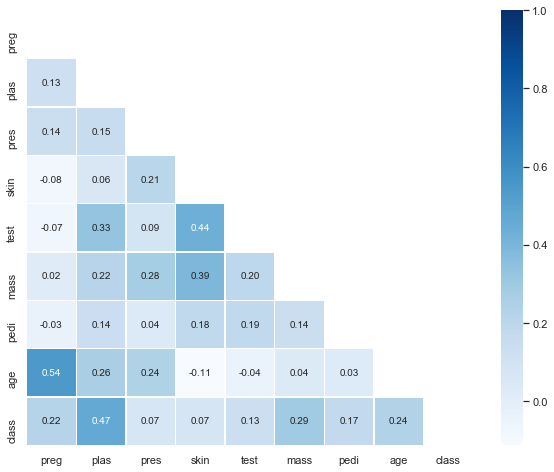

In [53]:
plt.figure(figsize=(10,8))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = data.corr(), annot=True, mask=mask,
fmt = '.2f', linewidths=.5, cmap='Blues')

In [54]:
xdata=np.array(data[['plas','mass']])
ydata=np.array(data[['class']])

print(xdata.shape)
print(ydata.shape)


(768, 2)
(768, 1)


In [55]:
ss.fit(xdata)
xdata=ss.transform(xdata)

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size= 0.3, random_state=321)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(537, 2)
(231, 2)
(537, 1)
(231, 1)


In [57]:
x=tf.placeholder(tf.float32,[None, 2])
y=tf.placeholder(tf.float32,[None, 1])
w=tf.Variable(tf.random_normal([2,1]))
b=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(x,w)+ b)
cost=-tf.reduce_mean(y*tf.log(hf) + (1-y)*tf.log(1-hf))

In [58]:
train=tf.train.GradientDescentOptimizer(3e-4).minimize(cost)
predicted=tf.cast(hf>0.5, dtype=tf.float32) #True->1.0 False->0.0
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [59]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(30001):
        sess.run([train, cost], feed_dict={x:xtrain, y:ytrain})
        # if step%200==0:
        #     print(step, cv)
    h,p,a =sess.run([hf, predicted, accuracy], feed_dict={x:xtest, y:ytest})
    print("hf: ", h, "pred: ",p, "acc: ",a) 

hf:  [[0.11801818]
 [0.28002805]
 [0.89213884]
 [0.17920104]
 [0.06953368]
 [0.2512384 ]
 [0.18298006]
 [0.40238202]
 [0.24387723]
 [0.12543541]
 [0.7007666 ]
 [0.5222187 ]
 [0.45834458]
 [0.11578181]
 [0.19219178]
 [0.16461957]
 [0.66252804]
 [0.162788  ]
 [0.06627303]
 [0.49485362]
 [0.3800953 ]
 [0.16850871]
 [0.15580037]
 [0.46752635]
 [0.54707676]
 [0.5134696 ]
 [0.2377145 ]
 [0.09311423]
 [0.2716313 ]
 [0.7712046 ]
 [0.6027085 ]
 [0.18517646]
 [0.26191992]
 [0.07145378]
 [0.34250528]
 [0.89516306]
 [0.11036411]
 [0.53965324]
 [0.54581076]
 [0.6439363 ]
 [0.62801766]
 [0.11715996]
 [0.7191217 ]
 [0.10402143]
 [0.8709121 ]
 [0.20714244]
 [0.08437052]
 [0.14490119]
 [0.19819304]
 [0.8467263 ]
 [0.17780358]
 [0.41391575]
 [0.13719365]
 [0.43084526]
 [0.12089881]
 [0.27925563]
 [0.40867728]
 [0.8396535 ]
 [0.09419638]
 [0.29198343]
 [0.44510198]
 [0.03505543]
 [0.17237687]
 [0.09338644]
 [0.22548372]
 [0.39749217]
 [0.16088781]
 [0.14162406]
 [0.34812403]
 [0.5899893 ]
 [0.3007406 ]
 

버섯버섯

In [60]:
mdata =pd.read_csv("mushrooms.csv")

In [61]:
print(data.head())
data.shape

preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


(768, 9)

주식주식

In [62]:
 from pandas_datareader import data
 import fix_yahoo_finance as yf
 yf.pdr_override()
 start_date = '2015-01-01' 
 end_date = '2019-12-31' 
 KIA = data.get_data_yahoo('005930.KS', start_date, end_date)

ModuleNotFoundError: No module named 'pandas_datareader'